# Musicians perception of classical mandolin sound features

# Index:

* [Context](#context)
* [Considered mandolins](#considered_mandolins)
* [Survey setup](#survey_setup)
    * [First phase](#first_phase)
        * [Most significant adjectives](#adjectives_barplot)
    * [Second phase](#second_phase)
        * [Remove outliers](#remove_outliers)
        * [Audience analysis](#audience_analysis)
        * [Musical background](#musical_background)
        * [Instruments features](#instruments_features)
        * [Instruments fingerprint](#polar_plot)
        * [Instruments features - 2D matrix](#features_2D_image)
        * [Features correlation](#correlation_plot)
        * [Instruments comparison](#comparison)
        * [Answers for each category](#category_answers)

In [15]:
# IMPORTS
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['text.usetex'] = False
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter

# Context <a class="anchor" id="context"></a>

Across the years, the classical Italian mandolin-making tradition has not introduced significant changes, resulting today in building instruments very similar to those made three centuries ago. Addressing this problem is fundamental if we want to innovate and improve the produced instruments.
This study presents the results of a blind listening test conducted on five classical mandolins: two built following the tradition and three built trying to overcome the limitations mentioned above by modifying some aspects from the construction point of view.
All the instruments were built by the same luthiers in a progressive fashion, starting from a model very close to tradition up to one with significant changes. The modifications are designed to enhance the mandolin sound and improve its acoustic performance.
We evaluate the instruments in a blind listening test to determine whether the differences in the building reflect different sound characteristics and to verify whether the judgments coincide with those expressed by musicians that played the instruments in person.
In the blind test, an instrument built by one of the most known luthiers in the mandolin field is also considered, as a term of comparison to validate the results obtained.  

The presented dataset introduces the results of the survey and processes them obtained to verify if there is a correspondence between the collected answers and the structural characteristics of the instruments.

# Considered mandolins <a class="anchor" id="considered_mandolins"></a>

The presented instruments are all classical bowl-back Italian mandolins with different structural features.
- Mandolin M1 was built by luthier Gabriele Pandini in 1997 and can be considered as a reference for traditionally built classical mandolins.
- M2 has a traditional bracing, showing a bent soundboard and three transversal braces.
- M3 has a thinner bent soundboard and a composite (spruce + carbon fiber) bracing designed to recover a stiffness similar to M2.
- M4 features a thin spherical soundboard (3m radius) reinforced with lattice bracing made of spruce and carbon fiber.
- M5 has a different type of bracing, inspired by modern guitar design and adapted to mandolins, called falcate bracing.

Here are the diagrams for the different types of bracing.

![figure_bracing](../figures/figure_bracing.PNG)

# Survey setup <a class="anchor" id="survey_setup"></a>

The evaluation test consists of two phases, held at two different stages. First, we performed a somewhat exploratory study aimed to identify the best parameters to characterize the sound of a mandolin. 
Then, with the insights from the exploratory test, we performed a blind listening test where the mandolins were evaluated according to those aspects that turned out to be the most significant in the previous step. This is the core of the study. 

We adopted such an approach since this is the first study of its kind performed on mandolins, and we wanted to select the evaluation parameters as objectively as possible, without any bias. In this way, we do not choose the evaluation criteria directly, but they are determined experimentally.

For the first step only professional mandolin players with several years of experience were invited, while for the second we involved any musician, regardless of the instrument played and the experience level.

## First phase <a class="anchor" id="first_phase"></a>

In this phase of the questionnaire we want to identify, with the help of expert mandolin players, which are the most significant parameters and adjectives to describe the sound of a mandolin and point out the characteristics that an "ideal" mandolin should have. We use the results obtained here to arrange the following blind listening test.

We asked the interviewees to choose from a list of 11 pairs of adjectives (each opposite to the other) the six most meaningful ones to evaluate the mandolin's sound.

### Most significant adjectives <a class="anchor" id="adjectives_barplot"></a>

#### Load and prepare data

In [16]:
csv_path = '../data/part1_15.csv'
data_1 = pd.read_csv(csv_path)

data_1.drop(data_1.columns[:2], axis=1, inplace=True)
data_1.drop(data_1.columns[22:], axis=1, inplace=True)

adj = data_1.iloc[:,0]
adj_list = adj.to_list()
#list = [l.split(',') for l in ','.join(adj_list).split('|')][0]

adj_list = []
for elem in list:
    j = elem.replace(' ', '')
    adj_list.append(j)

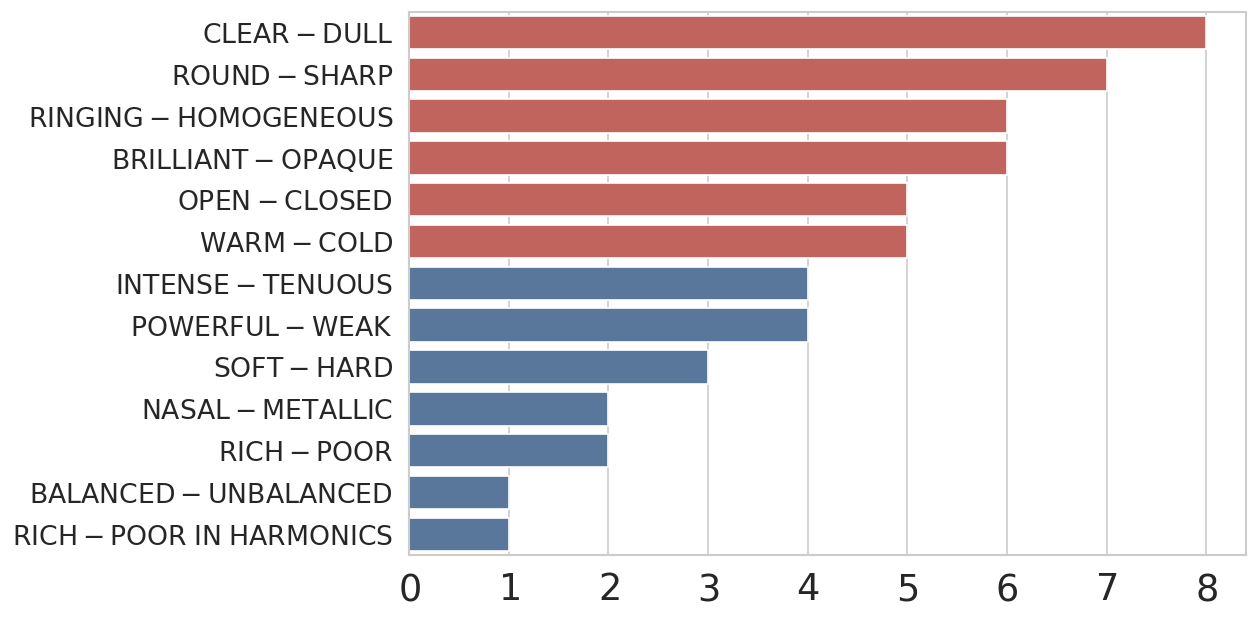

In [17]:
count = Counter(adj_list)
num_occurrences = pd.DataFrame.from_dict(count, orient='index').reset_index()

# Make titles in Latex font and enlarge fontsize
num_occurrences.iloc[0, 0] = r'$\mathrm{RINGING-HOMOGENEOUS}$'
num_occurrences.iloc[1, 0] = r'$\mathrm{OPEN-CLOSED}$'
num_occurrences.iloc[2, 0] = r'$\mathrm{INTENSE-TENUOUS}$'
num_occurrences.iloc[3, 0] = r'$\mathrm{SOFT-HARD}$'
num_occurrences.iloc[4, 0] = r'$\mathrm{WARM-COLD}$'
num_occurrences.iloc[5, 0] = r'$\mathrm{BRILLIANT-OPAQUE}$'
num_occurrences.iloc[6, 0] = r'$\mathrm{POWERFUL-WEAK}$'
num_occurrences.iloc[7, 0] = r'$\mathrm{ROUND-SHARP}$'
num_occurrences.iloc[8, 0] = r'$\mathrm{NASAL-METALLIC}$'
num_occurrences.iloc[9, 0] = r'$\mathrm{CLEAR-DULL}$'
num_occurrences.iloc[10, 0] = r'$\mathrm{RICH-POOR}$'
num_occurrences.iloc[11, 0] = r'$\mathrm{BALANCED-UNBALANCED}$'
num_occurrences.iloc[12, 0] = r'$\mathrm{RICH-POOR\;IN\;HARMONICS}$'

num_occurrences = num_occurrences.sort_values(by=[0], ascending=False)

y_ticks = np.array([r'$\mathrm{0}$', r'$\mathrm{1}$', r'$\mathrm{2}$', r'$\mathrm{3}$', r'$\mathrm{4}$',
                    r'$\mathrm{5}$', r'$\mathrm{6}$', r'$\mathrm{7}$', r'$\mathrm{8}$', ])

f, ax = plt.subplots(figsize=(9, 6), dpi=120)
sns.set_theme(style="whitegrid")
clrs = ['#4e76a5' if (x < num_occurrences[0][4]) else '#d1564e' for x in num_occurrences[0]]
b = sns.barplot(x=0, y="index", data=num_occurrences,
            label="Total", palette=clrs)#color="b")
b.set_xticklabels(y_ticks, size=22)
b.set_yticklabels(np.array(num_occurrences.iloc[:,0]), size=16)
ax.set(xlabel=None, ylabel=None)

plt.show()

## Second phase <a class="anchor" id="second_phase"></a>

Here, we aimed to characterize the sound of 5 different mandolins according to the most significant parameters detected in the previous step of the study.

This stage was divided into two sections.
In the first one, the interviewees listen to the mandolins' sounds one at a time and assess them individually. Then, they listen to them in pairs, and a comparative evaluation between the two is required.
In both cases, the audience does not know which instrument is listening to.

For the first evaluation, we consider the six pairs of adjectives most voted in the first survey (clear-dull, warm-cold, brilliant-opaque, open-closed, round-sharp, ringing-homogeneous).
For each couple of adjectives, we consider a 6-point Likert bipolar scale ranging.

Then, in the two-mandolin comparison, we considered only three instruments, to avoid having a too long and scattered test. 
For each comparison, the listener was asked to indicate which of the two mandolins had a sound that was more <em>brilliant</em>, <em>warm</em>, <em>round</em>, and <em>soft</em>.
Finally, he was asked to express an overall preference between the two instruments.

#### Load and prepare data

In [18]:
csv_path = '../data/part2_109.csv'
data = pd.read_csv(csv_path)

data = data.drop(['Timestamp', 'Email Address'], axis=1)
for idx, language in data.iloc[:, 0].items():
    if language == 'Italiano':
        data.iloc[idx, 63:125] = np.array(data.iloc[idx, 1:63])
    else:
        data.iloc[idx, 1:63] = np.array(data.iloc[idx, 63:125])
        
data.drop(data.columns[1:63], axis=1, inplace=True)

data.loc[data[data.columns[2]] == "Conservatory graduate / Professional player", data.columns[2]] = "Graduate/Professionist"
data.loc[data[data.columns[2]] == 'Self-taught / amateur',data.columns[2]] = "Amateur"
data.loc[data[data.columns[2]] == 'I took a few lessons in the past',data.columns[2]] = "Few lessons"

data.loc[data[data.columns[0]] == 'Italiano', data.columns[0]] = "Italian"
data.loc[data[data.columns[1]] == 'Sì', data.columns[1]] = 'Yes'
data.loc[data[data.columns[2]] == 'Autodidatta / dilettante', data.columns[2]]  = "Amateur"
data.loc[data[data.columns[2]] == 'Ho preso qualche lezione in passato', data.columns[2]]  = "Few lessons"
data.loc[data[data.columns[2]] == 'Attualmente studente', data.columns[2]]  = "Currently student"
data.loc[data[data.columns[2]] == 'Diplomato in conservatorio / Professionista', data.columns[2]]  = "Graduate/Professionist"
data.loc[data[data.columns[3]] == 'Sì', data.columns[3]] = 'Yes'
columns = range(44, 62)
for col in columns:
    data.loc[data[data.columns[col]] == 'Mandolino 1', data.columns[col]] = 'Mandolin 1'
    data.loc[data[data.columns[col]] == 'Mandolino 2', data.columns[col]] = 'Mandolin 2'
    data.loc[data[data.columns[col]] == 'Non saprei', data.columns[col]] = 'I don\'t know'
    data.loc[data[data.columns[col]] == 'Non saprei / Sono molto simili', data.columns[col]] = 'I don\'t know'
data = data.rename(columns={data.columns[0]: 'Language'})

data.head(2)

,Language,Are you a musician?,"If yes, what is your study path?",Are you a mandolin player or do you play plucked instruments?,On a scale of 1 to 6 you would define this mandolin sound more...,On a scale of 1 to 6 you would define this mandolin sound more....1,On a scale of 1 to 6 you would define this mandolin sound more....2,On a scale of 1 to 6 you would define this mandolin sound more....3,On a scale of 1 to 6 you would define this mandolin sound more....4,On a scale of 1 to 6 you would define this mandolin sound more....5,...,Which of the two mandolins has a sound that is more... [Soft].1,"Which of the two mandolins has a sound that is more... [Higher ""sustain"" (longer notes)].1",In general you prefer the sound of....1,Which of the two mandolins has a sound that is more... [Brilliant].2,Which of the two mandolins has a sound that is more... [Round].2,Which of the two mandolins has a sound that is more... [Warm].2,Which of the two mandolins has a sound that is more... [Soft].2,"Which of the two mandolins has a sound that is more... [Higher ""sustain"" (longer notes)].2",In general you prefer the sound of....2,"If you have any comments, observations or suggestions, please indicate them below."
0,Italian,Yes,Graduate/Professionist,Yes,5.0,2.0,4.0,2.0,4.0,4.0,...,Mandolin 1,Mandolin 1,Mandolin 2,Mandolin 1,I don't know,Mandolin 2,Mandolin 1,Mandolin 1,Mandolin 1,NaN
1,Italian,Yes,Currently student,Yes,4.0,3.0,3.0,3.0,4.0,4.0,...,I don't know,I don't know,I don't know,Mandolin 2,Mandolin 1,Mandolin 2,Mandolin 1,Mandolin 2,Mandolin 2,NaN


### Remove outliers <a class="anchor" id="remove_outliers"></a>

We noticed that some interviewees gave non-significant answers, always giving identical answers to almost all the questions. We realized this by computing the STD for each respondent on all questions they provided. To prevent this phenomenon from distorting our analysis, we eliminated the responses of all the interviewees with an STD<1.

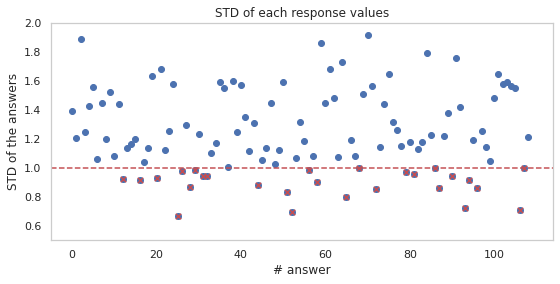

In [19]:
std_min = 1
data_part = data.iloc[:, 4:43]
# mean_val = np.mean(data2, axis=1)
std_val = np.std(data_part, axis=1)
#if std_min:
#    data = data.loc[std_val > std_min, :]

plt.figure(figsize=(9,4))
plt.scatter(range(len(std_val)),std_val)

plt.hlines(std_min, -5, len(std_val)+5, colors='r', linestyles='dashed')
    
minor_val = [(x,y) for x,y in enumerate(std_val) if y < std_min]
if len(minor_val) > 0:
    xmin,ymin = zip(*minor_val)
    plt.scatter(xmin,ymin,marker="x",color='r',s=30)

plt.xlim([-5, len(std_val)+5])
plt.ylim((0.5,2))
plt.ylabel('STD of the answers')
plt.xlabel('# answer')
plt.grid()
plt.title("STD of each response values")
plt.show()

In [20]:
#discard values with std < std_min
if std_min:
    data_part = data.iloc[:,4:43]
    # mean_val = np.mean(data2, axis=1)
    std_val = np.std(data_part, axis=1)
    data = data.loc[std_val > std_min,:]

### Audience analysis <a class="anchor" id="audience_analysis"></a>

[DESCRIZIONE DEL GRAFICO]

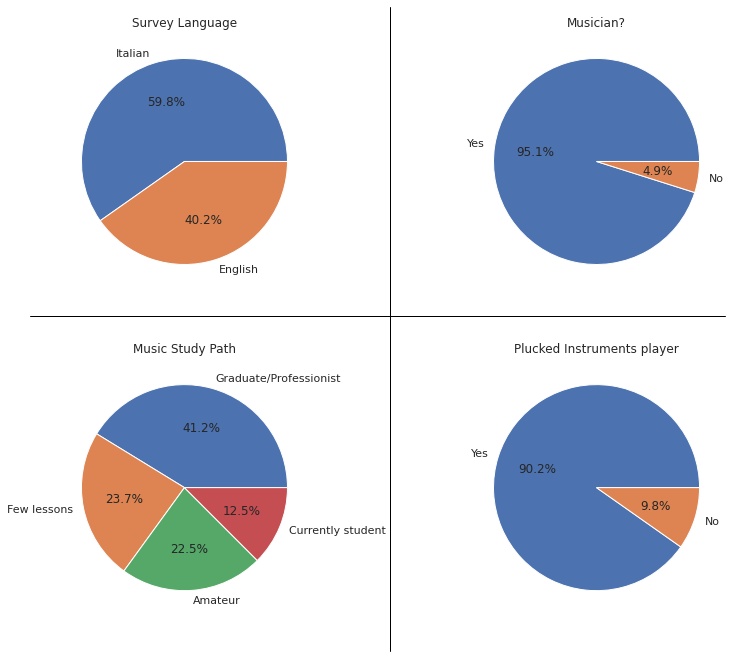

In [24]:
fig, axes = plt.subplots(2,2,figsize=(12,12))
titles = ['Survey Language','Musician?','Music Study Path','Plucked Instruments player']
for i in range(4):
    labels = list(data.iloc[:, i].value_counts().index.values)
    axes[int(i/2)][i%2].pie(data.iloc[:, i].value_counts(), autopct='%.1f%%',labels = labels)
    axes[int(i/2)][i%2].set_title(titles[i])
    #axes[int(i/2)][i%2].legend(data.iloc[:, i].value_counts().index.values)
#axes[1,0].legend(data.iloc[:, 2].value_counts().index.values,bbox_to_anchor=(1.5,0.2))
plt.subplots_adjust(hspace=0,wspace=0.6)
plt.plot([1.3,1.3], [1.1,-1.4], color='black', lw=1, transform=axes[0][0].transAxes, clip_on=False) #vertical line
plt.plot([-0.1,2.6],[-0.1,-0.1], color='black', lw=1,transform=axes[0][0].transAxes, clip_on=False) #orizontal line
plt.show()

### Musical background <a class="anchor" id="musical_background"></a>

[DESCRIZIONE DEL GRAFICO]

[0.04878048780487805, 0.3923780487804878, 0.22591463414634144, 0.21402439024390243, 0.11890243902439024]


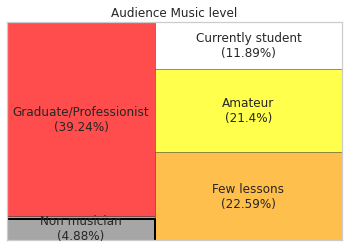

In [25]:
import squarify # pip install squarify
sizes = []
musicians = list(data.iloc[:, 1].value_counts())
sizes.append(musicians[1] / sum(musicians)) #first size is non musicians
study_path = list(data.iloc[:, 2].value_counts())
for s in study_path:
    sizes.append( (1-sizes[0]) * s/sum(study_path))
print(sizes)
colors = ["grey","red","orange","yellow","white"]
#norm = mpl.colors.Normalize(vmin=min(sizes), vmax=max(sizes))
#colors = [mpl.cm.Blues(norm(value)) for value in sizes]
labels = ["Non musician"] + list(data.iloc[:, 2].value_counts().index.values)
for i in range(len(labels)):
    labels[i] = labels[i]+"\n("+str(round(sizes[i]*100,2))+"%)"
squarify.plot(sizes=sizes, label=labels, alpha=0.7, color=colors, bar_kwargs=dict(linewidth=0.5, edgecolor="#222222"),text_kwargs={'fontsize':12, 'wrap':True})
plt.plot([0,100*(sizes[0]+sizes[1]),100*(sizes[0]+sizes[1])],[200*sizes[0],200*sizes[0],0],color='black', lw=2)
plt.title("Audience Music level")
plt.yticks([],[])
plt.xticks([],[])
plt.show()


### Instruments features <a class="anchor" id="instruments_features"></a>

[DESCRIZIONE DEL GRAFICO]

#### First we define a function to analyse single instruments

In [26]:
def plot_single_instrument_boxplot(data, start, end, title):

    font_size = 12

    labels_top = [r'$\mathrm{Dull}$',r'$\mathrm{Cold}$',r'$\mathrm{Opaque}$',r'$\mathrm{Sharp}$',
                  r'$\mathrm{Homog.}$',r'$\mathrm{Closed}$']
    labels_bottom = [r'$\mathrm{Clear}$',r'$\mathrm{Warm}$',r'$\mathrm{Brilliant}$',r'$\mathrm{Round}$',
                     r'$\mathrm{Ringing}$',r'$\mathrm{Open}$']
    labels_comparison = [r'$\mathrm{WWDF2}$',r'$\mathrm{WWDF1}$',r'$\mathrm{WWDF3}$',r'$\mathrm{CA-STD}$',
                     r'$\mathrm{Pandini}$']

    #sns.set_theme(style="whitegrid")
    if end:
        ax = sns.boxplot(data=data.iloc[:, start:end])
        # ax = sns.violinplot(data=data.iloc[:, start:end])
        ax.set_xticks(np.arange(len(labels_bottom)))
        ax.set_xticklabels(labels_bottom, fontdict={'fontsize': font_size})

        secax = ax.secondary_xaxis('top', functions=None)
        secax.set_xticks(np.arange(len(labels_top)))
        secax.set_xticklabels(labels_top, fontdict={'fontsize': font_size})
    else:
        ax = sns.boxplot(data=data.iloc[:, start])
        # ax = sns.violinplot(data=data.iloc[:, start])
        ax.set_xticks(np.arange(len(labels_comparison)))
        ax.set_xticklabels(labels_comparison, fontdict={'fontsize': font_size})

    ax.set_title('$\mathrm{' + title.replace(" ", "\;") + '}$', fontsize= font_size+2, y=1.13)

    return ax

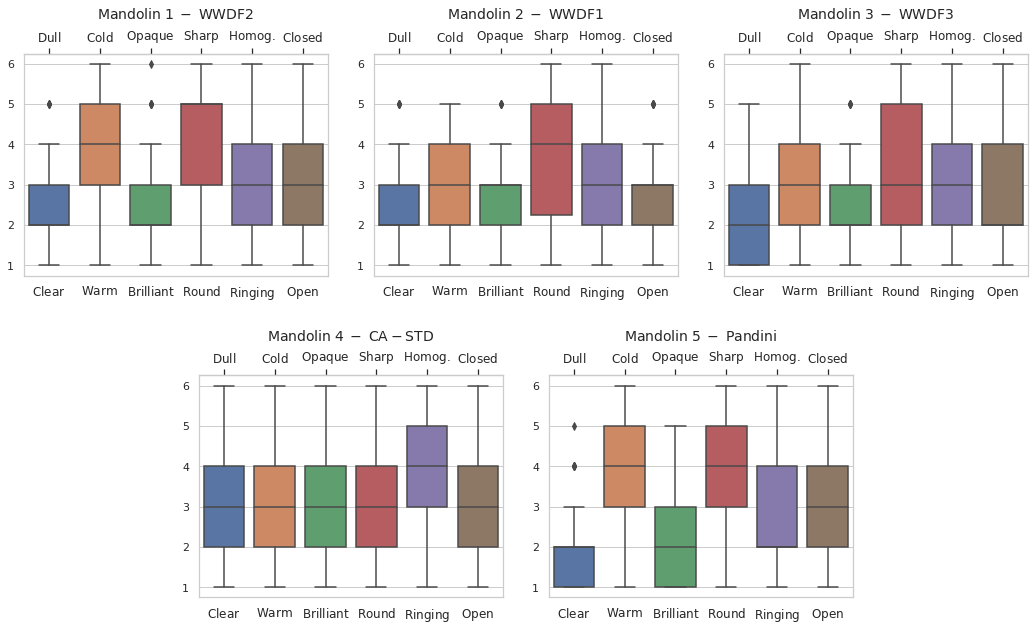

In [27]:
#fig, axes = plt.subplots(8,8,figsize=(15,30))
plt.figure(figsize=(18,10))
grid = plt.GridSpec(2,6, wspace=0.35, hspace=0.45)

plt.subplot(grid[0:1,0:2])
plot_single_instrument_boxplot(data, 4, 10, 'Mandolin 1 - WWDF2')

plt.subplot(grid[0:1, 2:4])
plot_single_instrument_boxplot(data, 12, 18, 'Mandolin 2 - WWDF1')

plt.subplot(grid[0:1, 4:6])
plot_single_instrument_boxplot(data, 20, 26, 'Mandolin 3 - WWDF3')

plt.subplot(grid[1:2, 1:3])
plot_single_instrument_boxplot(data, 28, 34, 'Mandolin 4 - CA-STD')

plt.subplot(grid[1:2, 3:5])
plot_single_instrument_boxplot(data, 36, 42, 'Mandolin 5 - Pandini')

# OVERALL COMPARISON
# plot_single_instrument_boxplot(data, [11, 19, 27, 35, 43], None, 'Overall Comparison')

plt.show()

### Instruments features - 2D matrix <a class="anchor" id="features_2D_image"></a>

In [68]:
adjectives = [r'$\mathrm{Dull}$',r'$\mathrm{Cold}$',r'$\mathrm{Opaque}$',r'$\mathrm{Sharp}$',r'$\mathrm{Homogeneous}$',r'$\mathrm{Closed}$']
mandolins = [r'$\mathrm{M1}$', r'$\mathrm{M2}$', r'$\mathrm{M3}$', r'$\mathrm{M4}$', r'$\mathrm{M5}$']

mand1 = np.mean(data.iloc[:, 4:10], axis=0).to_list()
mand2 = np.mean(data.iloc[:, 12:18], axis=0).to_list()
mand3 = np.mean(data.iloc[:, 20:26], axis=0).to_list()
mand4 = np.mean(data.iloc[:, 28:34], axis=0).to_list()
mand5 = np.mean(data.iloc[:, 36:42], axis=0).to_list()

[DESCRIZIONE DEL GRAFICO]

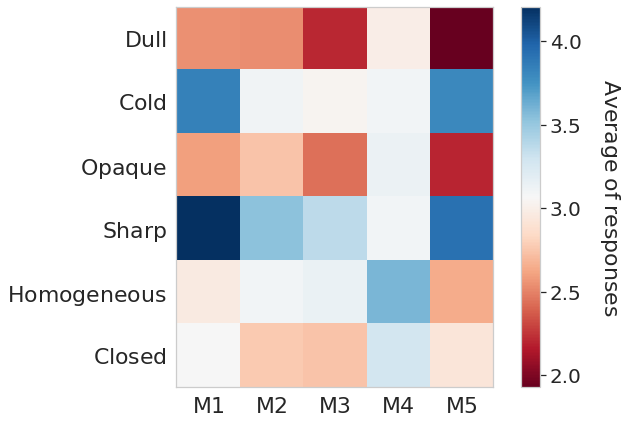

In [69]:
features_grid = np.array([mand1, mand2, mand3, mand4, mand5])
plt.figure(figsize=(10, 7))
sns.set_style("whitegrid", {'axes.grid' : False})

plt.imshow(features_grid.T, cmap='RdBu')
cbar = plt.colorbar()
cbar.set_label(r'$\mathrm{Average\;of\;responses}$', rotation=270, size=22, labelpad=40)
cbar.ax.tick_params(labelsize=20)

plt.xticks(range(5), mandolins, size=22)
plt.yticks(range(6), adjectives, size=22)
plt.show()

### Instruments fingerprint <a class="anchor" id="polar_plot"></a>

[DESCRIZIONE DEL GRAFICO]

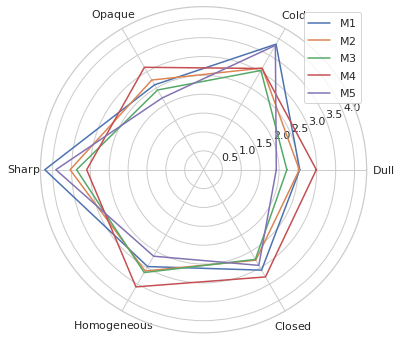

In [70]:
mand1.append(mand1[0])
mand2.append(mand2[0])
mand3.append(mand3[0])
mand4.append(mand4[0])
mand5.append(mand5[0])


plt.figure(figsize=(10, 6))
plt.subplot(polar=True)

theta = np.linspace(0, 2 * np.pi, len(mand1))

lines, labels = plt.thetagrids(range(0, 360, int(360 / len(adjectives))), (adjectives))
plt.plot(theta, mand1)
# plt.fill(theta, actual, 'b', alpha=0.1)
plt.plot(theta, mand2)
plt.plot(theta, mand3)
plt.plot(theta, mand4)
plt.plot(theta, mand5)

plt.legend(labels=mandolins, loc=1)
# plt.title("")
plt.show()


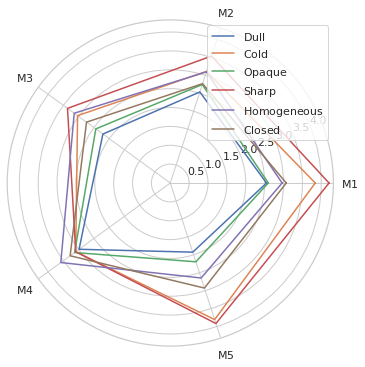

In [71]:
adj0 = [mand1[0], mand2[0], mand3[0], mand4[0], mand5[0], mand1[0]]
adj1 = [mand1[1], mand2[1], mand3[1], mand4[1], mand5[1], mand1[1]]
adj2 = [mand1[2], mand2[2], mand3[2], mand4[2], mand5[2], mand1[2]]
adj3 = [mand1[3], mand2[3], mand3[3], mand4[3], mand5[3], mand1[3]]
adj4 = [mand1[4], mand2[4], mand3[4], mand4[4], mand5[4], mand1[4]]
adj5 = [mand1[5], mand2[5], mand3[5], mand4[5], mand5[5], mand1[5]]

plt.figure(figsize=(10, 6))
plt.subplot(polar=True)

theta = np.linspace(0, 2 * np.pi, len(mand1)-1)

lines, labels = plt.thetagrids(range(0, 360, int(360 / len(mandolins))), (mandolins))
plt.plot(theta, adj0)
# plt.fill(theta, actual, 'b', alpha=0.1)
plt.plot(theta, adj1)
plt.plot(theta, adj2)
plt.plot(theta, adj3)
plt.plot(theta, adj4)
plt.plot(theta, adj5)

plt.legend(labels=adjectives, loc=1)
plt.show()

### Features correlation <a class="anchor" id="correlation_plot"></a>

[DESCRIZIONE DEL GRAFICO]

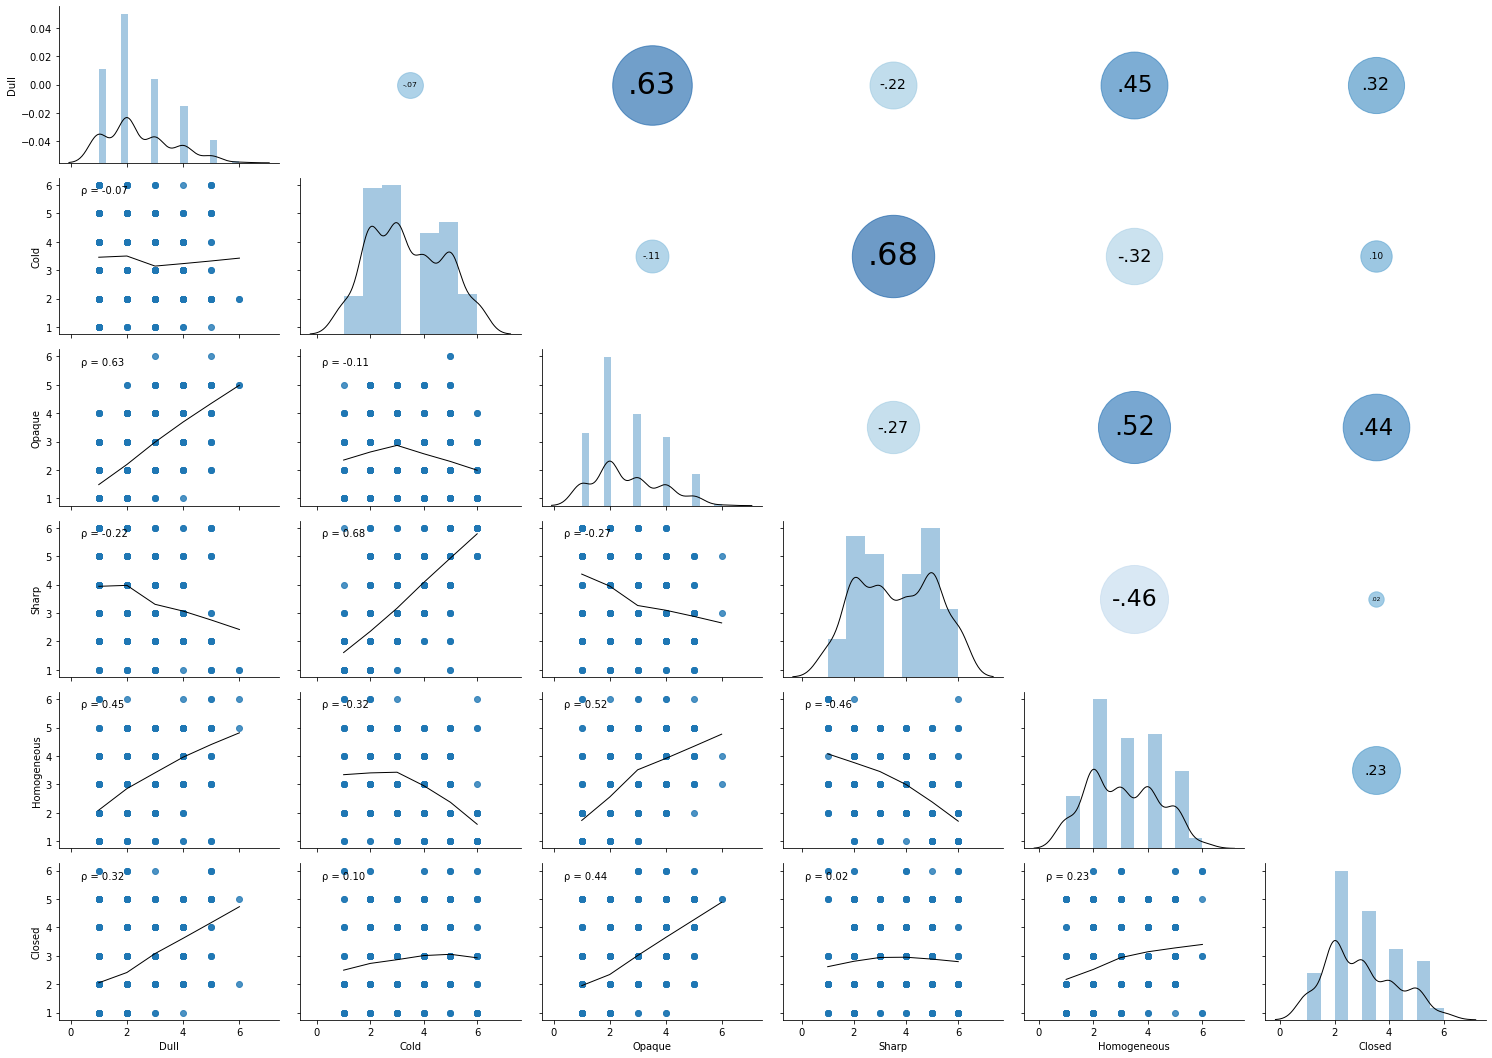

In [30]:
mand1 = data.iloc[:, 4:10]
mand2 = data.iloc[:, 12:18]
mand3 = data.iloc[:, 20:26]
mand4 = data.iloc[:, 28:34]
mand5 = data.iloc[:, 36:42]

mand1.columns = ["Dull", "Cold", "Opaque", "Sharp", "Homogeneous", "Closed"]
mand2.columns = ["Dull", "Cold", "Opaque", "Sharp", "Homogeneous", "Closed"]
mand3.columns = ["Dull", "Cold", "Opaque", "Sharp", "Homogeneous", "Closed"]
mand4.columns = ["Dull", "Cold", "Opaque", "Sharp", "Homogeneous", "Closed"]
mand5.columns = ["Dull", "Cold", "Opaque", "Sharp", "Homogeneous", "Closed"]

features = pd.concat([mand1, mand2, mand3, mand4, mand5])

from scipy.stats import pearsonr
import statsmodels

def corrfunc(x, y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    # Unicode for lowercase rho (ρ)
    rho = '\u03C1'
    ax.annotate(f'{rho} = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)

def corrdot(*args, **kwargs):
    
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 10000
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap="Blues",
               vmin=-1, vmax=1, transform=ax.transAxes)
    font_size = abs(corr_r) * 40 + 5
    ax.annotate(corr_text, [.5, .5, ], xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)

    # g = sns.pairplot(stocks,palette=["Blues_d"])

g = sns.PairGrid(features, aspect=1.4, diag_sharey=False)
g.map_lower(corrfunc)
g.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color': 'Black', 'linewidth': 1})
g.map_diag(sns.distplot, kde_kws={'color': 'Black', 'linewidth': 1})
g.map_upper(corrdot)
plt.show()

### Instruments comparison <a class="anchor" id="comparison"></a>

[DESCRIZIONE DEL GRAFICO]

[BAR PLOT]
[STACKED BAR CHART PLOT]

### Answers for each category <a class="anchor" id="category_answers"></a>

[DESCRIZIONE DEL GRAFICO]

[PLOT]